# Image Compression in Python using K-Means Clustering

In [ ]:
#Importing the required libraries.
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


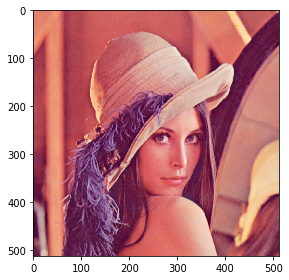

In [ ]:
#Loading the image.
image = io.imread('drive/My Drive/Colab Notebooks/Lenna.png')
io.imshow(image)
io.show()

In [ ]:
#Dimensions of the original image
nrows = image.shape[0]
ncols = image.shape[1]
print("Number of rows:",nrows,"\nNumber of columns:",ncols)

Number of rows: 512 
Number of columns: 512


In [ ]:
#Flattening the image
image = image.reshape(nrows*ncols, 4)

ValueError: ignored

In [ ]:
#Implementing K-means clustering to form 'K' clusters
for i in range(6,0,-1):
    i=pow(2,i)
    model = KMeans(n_clusters=i)
    model.fit(image)
    
    # Visualizing the image colors as scatter plot.
    plt.figure(figsize=(8, 6))
    plt.scatter(image[:,0], image[:,1], c=model.labels_.astype(float))
    plt.show()
    
    #Replacing each pixel value with its nearest centroid.
    compressed_image = model.cluster_centers_[model.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
    
    #Reshaping the image back to its original dimension.
    compressed_image = compressed_image.reshape(nrows, ncols, 4)
    
    #Save and display output image.
    print("Number of clusters:",i)
    io.imsave('compressed_image.png', compressed_image)
    io.imshow(compressed_image)
    io.show()